# DAE

In [1]:
# The libraries needed

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import numpy as np
from webdriver_manager.chrome import ChromeDriverManager
from selenium import webdriver
import requests
from bs4 import BeautifulSoup as bs
import time
import warnings
warnings.filterwarnings(action="ignore")

## DataFrame creation and slicing

In [2]:
# We build a DataFrame based on several csv files (the datadumps). Given that the files are so enourmous we do some data
# reductions as we build the frame.

df=pd.read_csv("datadump_s5-000.csv")
# We only consider the 'PC' platform as well as the highest ranked players
df = df.loc[df.platform == "PC"]
df = df.loc[df.skillrank == "Diamond"]
# We elect to drop these columns
df.drop(columns = ["objectivelocation", "roundduration", "clearancelevel", 'primaryweapon', 'primaryweapontype', 'primarysight', 'primarygrip', 'primaryunderbarrel', 'primarybarrel', 'secondaryweapon', 'secondaryweapontype', 'secondarysight', 'secondarygrip', 'secondaryunderbarrel', 'secondarybarrel', 'secondarygadget'], inplace=True)

# These for-loops adds the csv files on top of each other.
x=1
for i in range(1,10):
    print(x)
    temp_df = pd.read_csv(f"datadump_s5-00{i}.csv")
    temp_df = temp_df.loc[temp_df.platform == "PC"]
    temp_df = temp_df.loc[temp_df.skillrank == "Diamond"]
    temp_df.drop(columns = ["objectivelocation", "roundduration", "clearancelevel", 'primaryweapon', 'primaryweapontype', 'primarysight', 'primarygrip', 'primaryunderbarrel', 'primarybarrel', 'secondaryweapon', 'secondaryweapontype', 'secondarysight', 'secondarygrip', 'secondaryunderbarrel', 'secondarybarrel', 'secondarygadget'], inplace=True)
    df = pd.concat([df, temp_df])
    x+=1

for i in range(10, 22):
    print(x)
    temp_df = pd.read_csv(f"datadump_s5-0{i}.csv")
    temp_df = temp_df.loc[temp_df.platform == "PC"]
    temp_df = temp_df.loc[temp_df.skillrank == "Diamond"]
    temp_df.drop(columns = ["objectivelocation", "roundduration", "clearancelevel", 'primaryweapon', 'primaryweapontype', 'primarysight', 'primarygrip', 'primaryunderbarrel', 'primarybarrel', 'secondaryweapon', 'secondaryweapontype', 'secondarysight', 'secondarygrip', 'secondaryunderbarrel', 'secondarybarrel', 'secondarygadget'], inplace=True)
    df = pd.concat([df, temp_df])
    x+=1
    

# We remove these operators in the list below
operator_lst=["SPETSNAZ-RESERVE",'SAS-RESERVE','GIGN-RESERVE','GSG9-RESERVE','SWAT-RESERVE']
for i in operator_lst:
    df.drop(list(df.loc[df.operator == i].index), inplace=True)
df.reset_index(inplace=True)
df.drop(columns= "index", inplace=True)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21


## Creating column "match_result"
This column tells us whether the player the matchid is connected to won the match or not

In [3]:
a_frame = df.groupby(["matchid", "haswon"])["haswon"].count().to_frame().unstack()
a_frame.fillna(0, inplace=True)
a_lst = []
for i in range(len(a_frame)):
    if a_frame.iloc[i, 0] < a_frame.iloc[i, 1]:
        a_lst.append("match win")
    elif a_frame.iloc[i, 0] > a_frame.iloc[i, 1]:
        a_lst.append("match loss")
    else:
        a_lst.append("match draw")
a_frame["match_result"] = a_lst
index_a_frame = list(a_frame.index)

df["match_result"] = "match loss"

x=0
for i in index_a_frame:
    temp_lst = list(df.match_result.loc[df.matchid == i].index)
    df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
    x+=1

<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipytho

<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipytho

<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipytho

<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipytho

<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipytho

<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipytho

<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipytho

<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipytho

<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipytho

<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipytho

<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipytho

<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipytho

<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipytho

<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipytho

<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipytho

<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipytho

<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipytho

<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipytho

<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipytho

<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipytho

<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipytho

<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipytho

<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipytho

<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipytho

<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipytho

<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipytho

<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipytho

<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipytho

<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipytho

<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipytho

<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipytho

<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipytho

<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipytho

<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipytho

<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipytho

<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipytho

<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipytho

<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipytho

<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipytho

<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipytho

<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipytho

<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipytho

<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipytho

<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipytho

<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipython-input-3-4c012c8dc636>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.match_result.iloc._setitem_with_indexer(temp_lst, a_lst[x])
<ipytho

## Creating column "op_round_winrate"
This column tells us the winrate per round for the operator in the row

In [4]:
b_frame = df.groupby("operator", as_index=False).mean()[["operator", "haswon"]]
df["op_round_winrate"] = 0

for i in range(len(df)):
    x=0
    for j in list(b_frame.operator):
        if df.loc[i, "operator"] == j:
            df.loc[i, "op_round_winrate"] = b_frame.haswon[x]
        x+=1

# EDA

## Attacking operators round winrate & Best Attacking Team

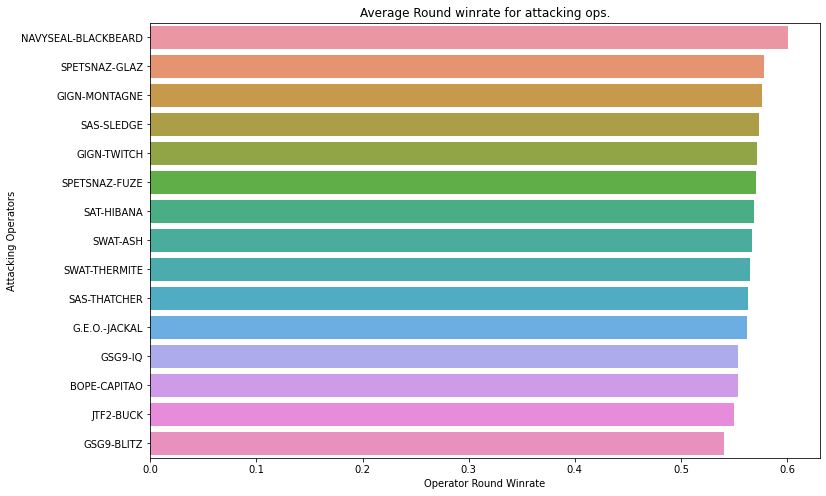

In [38]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df.loc[df.role == "Attacker"].sort_values(by="op_round_winrate", ascending=False), x="op_round_winrate", y="operator")
plt.ylabel("Attacking Operators")
plt.xlabel("Operator Round Winrate")
plt.title("Average Round winrate for attacking ops.")
plt.show()

In [6]:
# This list is used later on
attacking_lst = [i for i in df.loc[df.role == "Attacker"].groupby("operator", as_index=False).mean().sort_values(by="op_round_winrate", ascending=False).operator.head()]

## Defending operators round winrate & Best Defending Team

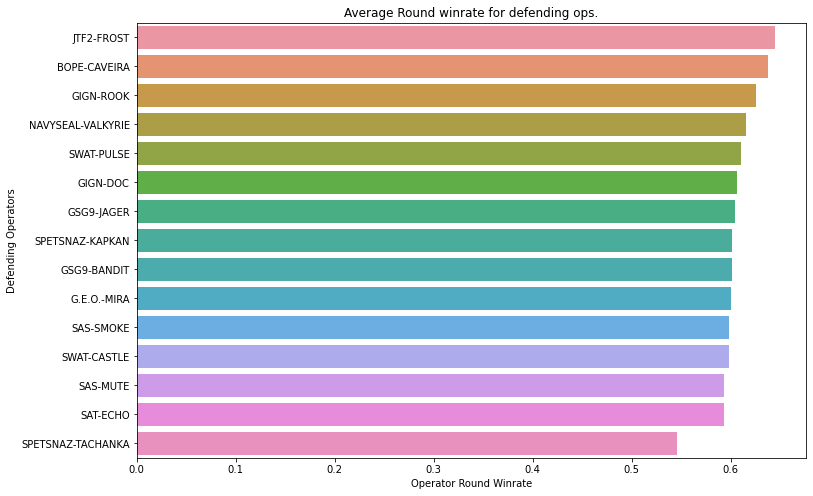

In [41]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df.loc[df.role == "Defender"].sort_values(by="op_round_winrate", ascending=False), x="op_round_winrate", y="operator")
plt.ylabel("Defending Operators")
plt.xlabel("Operator Round Winrate")
plt.title("Average Round winrate for defending ops.")
plt.show()

In [8]:
# This list is used later on
defending_lst = [i for i in df.loc[df.role == "Defender"].groupby("operator", as_index=False).mean().sort_values(by="op_round_winrate", ascending=False).operator.head()]

## Best Defending Team on the map "Border"

This plot is a way of visualizing that general winrate alone might not win you all matches. On the map "Border" different operators are the most likely to win.

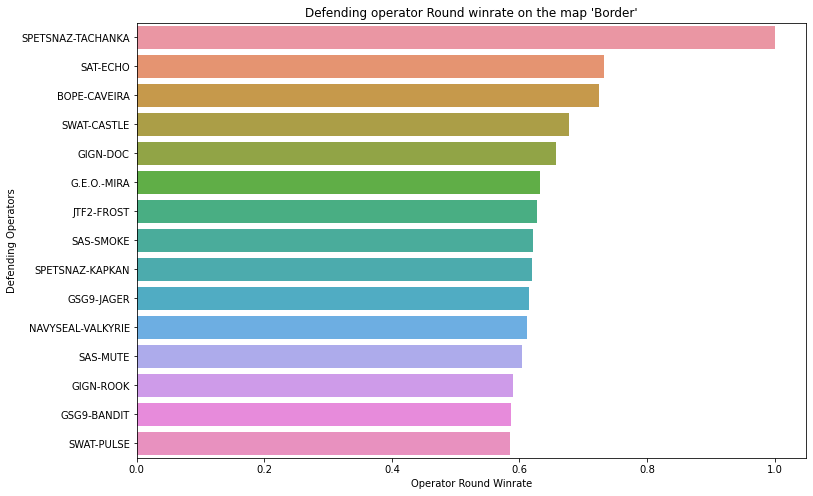

In [43]:
plt.figure(figsize=(12, 8))
map_df = df.loc[df.mapname == "BORDER"]
sns.barplot(data=map_df.loc[map_df.role == "Defender"].groupby("operator", as_index=False).mean().sort_values(by="haswon", ascending=False), x="haswon", y="operator")
plt.ylabel("Defending Operators")
plt.xlabel("Operator Round Winrate")
plt.title("Defending operator Round winrate on the map 'Border'")
plt.show()

## Correlation heatmap

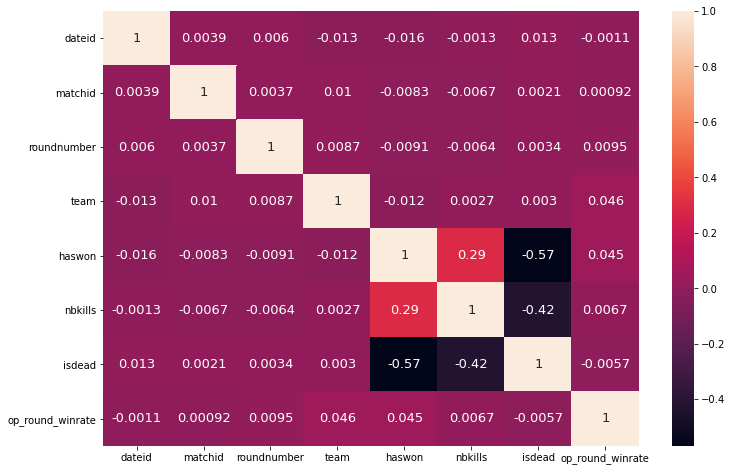

In [10]:
plt.figure(figsize=(12, 8))
sns.heatmap(data=df.corr(), annot=True, annot_kws = {"size":13})
plt.show()

## Number of matches per day

This plot illustrates gaps in the data

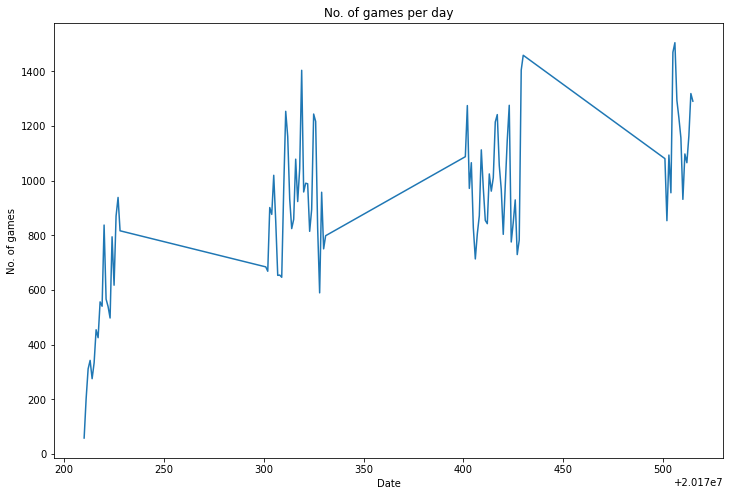

In [11]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df.groupby("dateid", as_index=False).count(), x="dateid", y="platform")
plt.ylabel("No. of games")
plt.xlabel("Date")
plt.title("No. of games per day")
plt.show()

## Winrate distribution

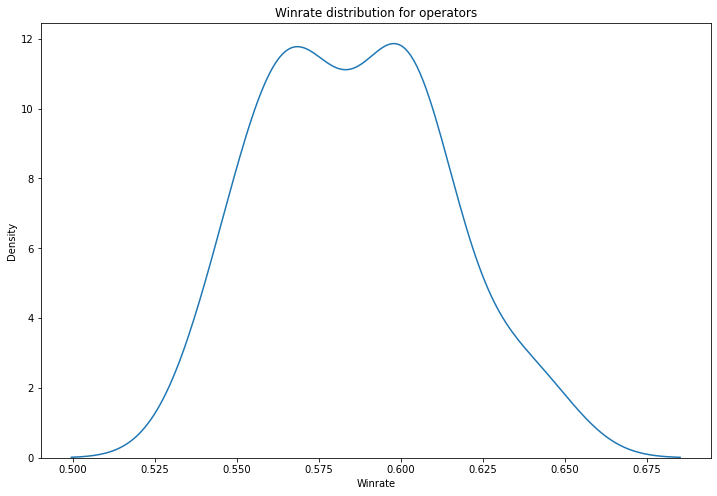

The standard deviation is: 0.4921091901332286


In [50]:
plt.figure(figsize=(12, 8))
sns.kdeplot(data=df.groupby("operator").mean(), x="haswon")
plt.title("Winrate distribution for operators")
plt.xlabel("Winrate")
plt.show()

print("The standard deviation is:", df.groupby("operator").std().haswon.mean())

## Statistical inference regarding potential winrate gain from switching operators to the best for certain maps

H0: The winrate of a map-specific team is not significantly higher than the team with the highest general winrate

H1: The winrate of a map-specific team is significantly higher than the team with the highest general winrate

$\alpha = 0.05$

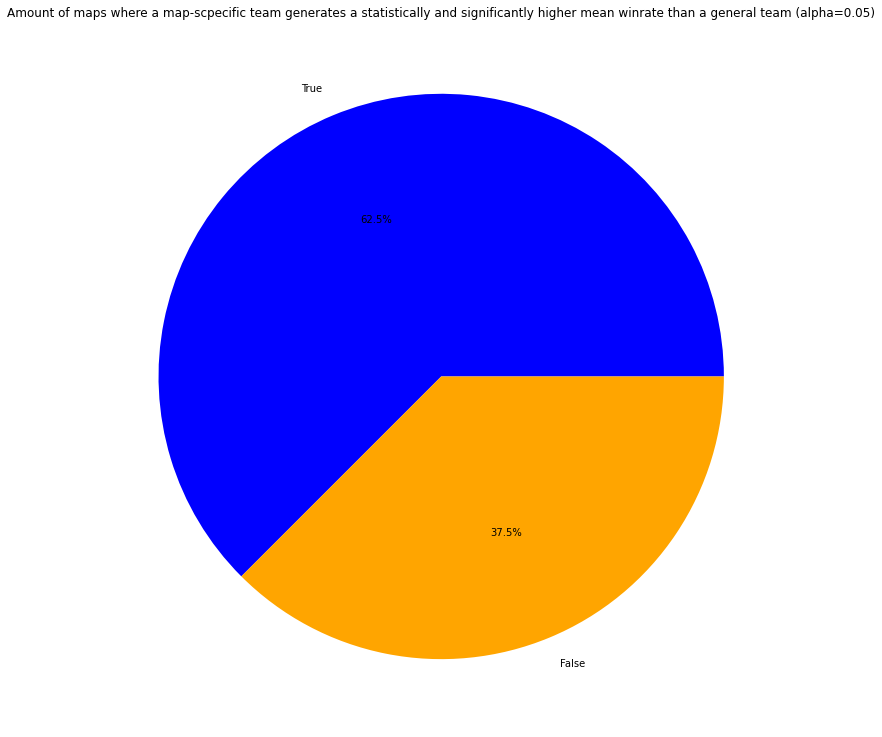

Maps where there's not enough support of discarding H0: ['BORDER', 'CONSULATE', 'KAFE_DOSTOYEVSKY', 'OREGON']


In [13]:
# The winrates for the team with highest general winrate
attacking_lst_mean = [i for i in df.loc[df.role == "Attacker"].groupby("operator", as_index=False).mean().sort_values(by="op_round_winrate", ascending=False).op_round_winrate.head()]
defending_lst_mean = [i for i in df.loc[df.role == "Defender"].groupby("operator", as_index=False).mean().sort_values(by="op_round_winrate", ascending=False).op_round_winrate.head()]

alpha=0.05

# These two lists are used for illustration purposes
pie_lst=[]
safe_maps=[]

# We're looping over all maps in the game
for j in df.mapname.unique().tolist():
    count=0
    map_df = df.loc[df.mapname == j]
    
    # Here is the best map-scpecific attacking and defending teams (in terms of winrate) and the winrate for its operators
    new_attacking_lst = [i for i in map_df.loc[map_df.role == "Attacker"].groupby("operator", as_index=False).mean().sort_values(by="haswon", ascending=False).operator.head()]
    new_attacking_lst_mean = [i for i in map_df.loc[map_df.role == "Attacker"].groupby("operator", as_index=False).mean().sort_values(by="haswon", ascending=False).haswon.head()]
    new_defending_lst = [i for i in map_df.loc[map_df.role == "Defender"].groupby("operator", as_index=False).mean().sort_values(by="haswon", ascending=False).operator.head()]
    new_defending_lst_mean = [i for i in map_df.loc[map_df.role == "Defender"].groupby("operator", as_index=False).mean().sort_values(by="haswon", ascending=False).haswon.head()]
    
    # Here we create a pie-chart that shows us the amount of maps that allows us to favour H1 instead of H0 given our
    # level of significance
    stat, pval = scipy.stats.ttest_ind(new_attacking_lst_mean, attacking_lst_mean, alternative="greater")
    pie_lst.append(alpha > pval)
    if alpha > pval:
        count+=1
    stat, pval = scipy.stats.ttest_ind(new_defending_lst_mean, defending_lst_mean, alternative="greater")
    pie_lst.append(alpha > pval)
    if alpha > pval:
        count+=1
    if count==2:
        safe_maps.append(j) # These maps doesn't let us reject H0 in favour of H1

# Changing the dtype of the elements of pie_lst to integers
x=0
for i in pie_lst:
    if i==True:
        pie_lst[x]=1
    else:
        pie_lst[x]=0
    x+=1
    
ma_plot = pd.DataFrame({"T or F":pie_lst}).value_counts().plot.pie(autopct="%1.1f%%", figsize=(17,13), labels=["True", "False"], colors=["Blue", "Orange"])
ma_plot.set(ylabel="")
plt.title("Amount of maps where a map-scpecific team generates a statistically and significantly higher mean winrate than a general team (alpha=0.05)")
plt.show()

print("Maps where there's not enough support of discarding H0:", safe_maps)

## Return/cost of running an esport team

An extremly simple mock example of the cost/return of running an e-sports team for a year.

In [46]:
yearly_inc = 800000
salary_of_players = 74000
cost_of_services = 26000

yearly_inc - 5*(salary_of_players + cost_of_services)

300000

## Statistical inference regarding potential winrate gain from switching the worst operator for certain maps
If we allow for our team members to choose between more than 5 operators (counting attacking and defending seperately), which additional operators should we choose beside those with the highest general winrate?

This is the strategy:
- Only consider the maps where there's a significant enough stastical benfit to make changes in the team comp
- Figure out the best operators for that specifc map (consider ATK/DEF seperately)
- Add all of the best operators to a list and remove the operators we already have on our team (i.e. the ones with highest general winrate)
- From this list, add operators to our team up until we start losing profits due to player upkeep (in this case it will be 2)
    - Prioritize operators that are the best on multiple maps first and then go for the operators that have a high general  winrate

In [15]:
old_attacking_lst = [i for i in attacking_lst]
old_defending_lst = [i for i in defending_lst]

new_ops_attack=[]
new_ops_defend=[]
for j in df.mapname.unique().tolist():
    if j in safe_maps:
        pass
    else:
        map_df = df.loc[df.mapname == j]
        attacking_lst = [i for i in old_attacking_lst]
        new_attacking_lst = [i for i in map_df.loc[map_df.role == "Attacker"].groupby("operator", as_index=False).mean().sort_values(by="haswon", ascending=False).operator.head()]
        new_defending_lst = [i for i in map_df.loc[map_df.role == "Defender"].groupby("operator", as_index=False).mean().sort_values(by="haswon", ascending=False).operator.head()]

        new_ops_attack.append(new_attacking_lst[0])
        new_ops_defend.append(new_defending_lst[0])

while len([i for i in old_attacking_lst if i in new_ops_attack])>0:
    for i in old_attacking_lst:
        if i in new_ops_attack:
            new_ops_attack.pop(new_ops_attack.index(i))

while len([i for i in old_defending_lst if i in new_ops_defend])>0:
    for i in old_defending_lst:
        if i in new_ops_defend:
            new_ops_defend.pop(new_ops_defend.index(i))

In [16]:
new_ops_attack_true=[]
x=0
for i in pd.Series(new_ops_attack).value_counts():
    if i > 1:
        new_ops_attack_true.append(list(pd.Series(new_ops_attack).value_counts().index)[x])
    x+=1
    
new_ops_defend_true=[]
x=0
for i in pd.Series(new_ops_defend).value_counts():
    if i > 1:
        new_ops_defend_true.append(list(pd.Series(new_ops_defend).value_counts().index)[x])
    x+=1
    
if len(new_ops_attack_true) ==2:
    pass
elif len(new_ops_attack_true) <2:
    while len(new_ops_attack_true) <2:
        x=0
        for i in df.loc[df.role == "Attacker"].groupby("operator").haswon.mean().sort_values(ascending=False):
            if list(df.loc[df.role == "Attacker"].groupby("operator").haswon.mean().sort_values(ascending=False).index)[x] not in new_ops_attack_true and list(df.loc[df.role == "Attacker"].groupby("operator").haswon.mean().sort_values(ascending=False).index)[x] not in attacking_lst and list(df.loc[df.role == "Attacker"].groupby("operator").haswon.mean().sort_values(ascending=False).index)[x] in new_ops_attack:
                new_ops_attack_true.append(list(df.loc[df.role == "Attacker"].groupby("operator").haswon.mean().sort_values(ascending=False).index)[x])
                break
            x+=1
else:
    while len(new_ops_attack_true) >2:
        x=0
        for i in df.loc[df.role == "Attacker"].groupby("operator").haswon.mean().sort_values(ascending=True):
            if list(df.loc[df.role == "Attacker"].groupby("operator").haswon.mean().sort_values(ascending=True).index)[x] not in new_ops_attack_true and list(df.loc[df.role == "Attacker"].groupby("operator").haswon.mean().sort_values(ascending=True).index)[x] not in attacking_lst and list(df.loc[df.role == "Attacker"].groupby("operator").haswon.mean().sort_values(ascending=False).index)[x] in new_ops_attack:
                new_ops_attack_true.pop(new_ops_attack.index(list(df.loc[df.role == "Attacker"].groupby("operator").haswon.mean().sort_values(ascending=True).index)[x]))
                break
            x+=1
    
            
            
if len(new_ops_defend_true) ==2:
    pass
elif len(new_ops_defend_true) <2:
    while len(new_ops_defend_true) <2:
        x=0
        for i in df.loc[df.role == "Defender"].groupby("operator").haswon.mean().sort_values(ascending=False):
            if list(df.loc[df.role == "Defender"].groupby("operator").haswon.mean().sort_values(ascending=False).index)[x] not in new_ops_defend_true and list(df.loc[df.role == "Defender"].groupby("operator").haswon.mean().sort_values(ascending=False).index)[x] not in defending_lst and list(df.loc[df.role == "Defender"].groupby("operator").haswon.mean().sort_values(ascending=False).index)[x] in new_ops_defend:
                new_ops_defend_true.append(list(df.loc[df.role == "Defender"].groupby("operator").haswon.mean().sort_values(ascending=False).index)[x])
                break
            x+=1
else:
    while len(new_ops_defend_true) >2:
        x=0
        for i in df.loc[df.role == "Defender"].groupby("operator").haswon.mean().sort_values(ascending=True):
            if list(df.loc[df.role == "Defender"].groupby("operator").haswon.mean().sort_values(ascending=True).index)[x] not in new_ops_defend_true and list(df.loc[df.role == "Defender"].groupby("operator").haswon.mean().sort_values(ascending=True).index)[x] not in defending_lst and list(df.loc[df.role == "Defender"].groupby("operator").haswon.mean().sort_values(ascending=False).index)[x] in new_ops_defend:
                new_ops_defend_true.pop(new_ops_defend.index(list(df.loc[df.role == "Defender"].groupby("operator").haswon.mean().sort_values(ascending=True).index)[x]))
                break
            x+=1
                
attacking_lst=attacking_lst + new_ops_attack_true
defending_lst=defending_lst + new_ops_defend_true

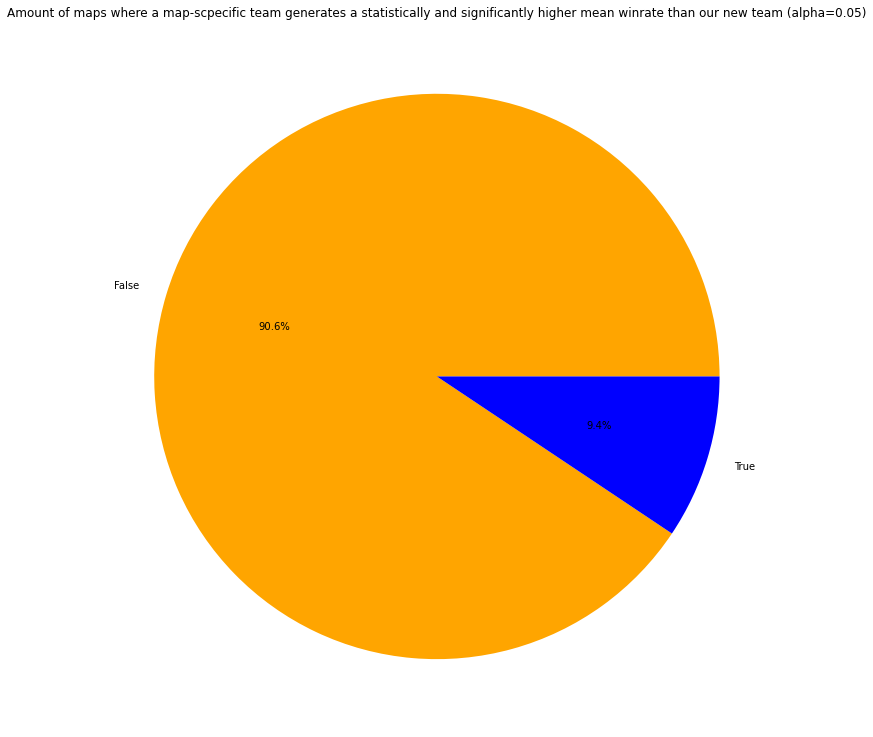

In [49]:
alpha=0.05
pie_lst=[]
for j in df.mapname.unique().tolist():
    map_df = df.loc[df.mapname == j]
    
    winrate_atk=[]
    winrate_def=[]
    for i in attacking_lst:
        winrate_atk.append(list(map_df.groupby("operator").mean().haswon.loc[map_df.groupby("operator").mean().index == i])[0])
    for i in defending_lst:
        winrate_def.append(list(map_df.groupby("operator").mean().haswon.loc[map_df.groupby("operator").mean().index == i])[0])
    
    arr_atk = np.array(winrate_atk)
    index_atk = arr_atk.argsort()[-5:][::-1]
    index_atk=list(index_atk)
    
    arr_def = np.array(winrate_def)
    index_def = arr_def.argsort()[-5:][::-1]
    index_def=list(index_def)
    
    my_map_team_atk = []
    my_map_team_atk_winrate=[]
    x=0
    for i in range(5):
        my_map_team_atk.append(attacking_lst[index_atk[x]])
        my_map_team_atk_winrate.append(winrate_atk[index_atk[x]])
        x+=1
        
    my_map_team_def = []
    my_map_team_def_winrate=[]
    x=0
    for i in range(5):
        my_map_team_def.append(defending_lst[index_def[x]])
        my_map_team_def_winrate.append(winrate_def[index_def[x]])
        x+=1
    
    new_attacking_lst = [i for i in map_df.loc[map_df.role == "Attacker"].groupby("operator", as_index=False).mean().sort_values(by="haswon", ascending=False).operator.head()]
    new_attacking_lst_mean = [i for i in map_df.loc[map_df.role == "Attacker"].groupby("operator", as_index=False).mean().sort_values(by="haswon", ascending=False).haswon.head()]

    new_defending_lst = [i for i in map_df.loc[map_df.role == "Defender"].groupby("operator", as_index=False).mean().sort_values(by="haswon", ascending=False).operator.head()]
    new_defending_lst_mean = [i for i in map_df.loc[map_df.role == "Defender"].groupby("operator", as_index=False).mean().sort_values(by="haswon", ascending=False).haswon.head()]
    
    stat, pval = scipy.stats.ttest_ind(new_attacking_lst_mean, my_map_team_atk_winrate, alternative="greater")
    pie_lst.append(alpha > pval)

    stat, pval = scipy.stats.ttest_ind(new_defending_lst_mean, my_map_team_def_winrate, alternative="greater")
    pie_lst.append(alpha > pval)

x=0
for i in pie_lst:
    if i==True:
        pie_lst[x]=1
    else:
        pie_lst[x]=0
    x+=1
    
ma_plot = pd.DataFrame({"T or F":pie_lst}).value_counts().plot.pie(autopct="%1.1f%%", figsize=(17,13), labels=["False", "True"], colors=["Orange", "Blue"])
ma_plot.set(ylabel="")
plt.title("Amount of maps where a map-scpecific team generates a statistically and significantly higher mean winrate than our new team (alpha=0.05)")
plt.show()

# Scraping
We're simply scraping data from the plaform "steam" as a way to gague the game's popularity during the time the player data was gathered

In [18]:
url = "https://steamcharts.com/app/359550"
soup = bs(requests.get(url).content)

date=[]
avg_players=[]
peak_players=[]
x=0
for i in range(1,67):
    x+=1
    date.append(soup.select(f"#content-wrapper > div:nth-child(7) > table > tbody > tr:nth-child({i}) > td.month-cell.left")[0].text)
    avg_players.append(soup.select(f"#content-wrapper > div:nth-child(7) > table > tbody > tr:nth-child({i}) > td.right.num-f")[0].text)
    peak_players.append(soup.select(f"#content-wrapper > div:nth-child(7) > table > tbody > tr:nth-child({i}) > td.right.num")[0].text)

In [19]:
# Data Cleaning: making sure the dates or on the form we like
for i in range(1, 66):
    date[i] = date[i][6:]
for i in range(1, 66):
    date[i] = date[i][:-5]

In [20]:
player_activity = pd.DataFrame({"date":date, "avg_players":avg_players, "peak_players":peak_players})

In [21]:
player_activity.avg_players =  pd.to_numeric(player_activity.avg_players)
player_activity.peak_players =  pd.to_numeric(player_activity.peak_players)

In [22]:
# We're isolating the dates that are present in the original dataframe
ind_lst=[]
ind_lst.append(list(player_activity.loc[player_activity.date == "February 2017"].index))
ind_lst.append(list(player_activity.loc[player_activity.date == "March 2017"].index))
ind_lst.append(list(player_activity.loc[player_activity.date == "April 2017"].index))
ind_lst = [i[0] for i in ind_lst]

player_activity_temp = player_activity.loc[ind_lst]

In [23]:
df["date"] = "April 2017"
feb_index=list(df.loc[df.dateid <= 20170231].index)
march_index=list(df.loc[df.dateid <= 20170331].index)
march_index=[i for i in march_index if i not in feb_index]


for i in feb_index:
    df.date.iloc._setitem_with_indexer(feb_index, "February 2017")
    
for i in march_index:
    df.date.iloc._setitem_with_indexer(march_index, "March 2017")

<ipython-input-23-bddea70c0192>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.date.iloc._setitem_with_indexer(feb_index, "February 2017")
<ipython-input-23-bddea70c0192>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.date.iloc._setitem_with_indexer(march_index, "March 2017")


In [24]:
df=df.merge(player_activity_temp, how="left", on="date")
df.drop(columns = "date", inplace=True)
df.rename(columns={"avg_players":"avg_players_monthly", "peak_players":"peak_players_monthly"}, inplace=True)

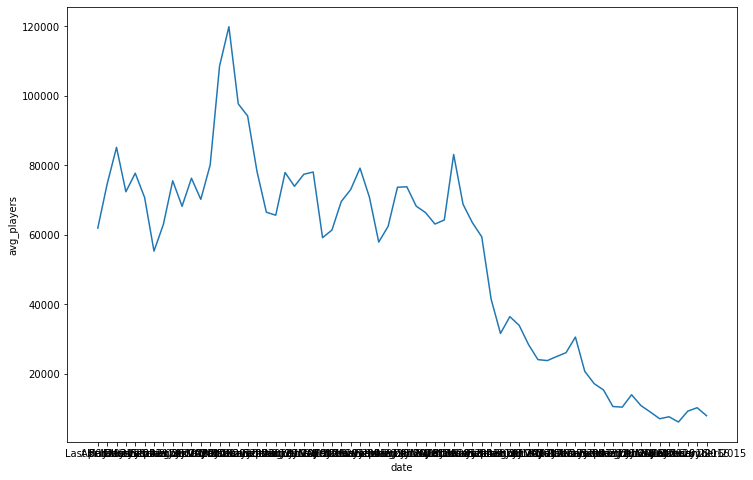

In [36]:
plt.figure(figsize=(12, 8))
ma_plot=sns.lineplot(data=player_activity, x="date", y="avg_players")
ma_plot.set(xticks="")

In [37]:
df

,dateid,platform,gamemode,mapname,matchid,roundnumber,winrole,endroundreason,skillrank,role,team,haswon,operator,nbkills,isdead,match_result,op_round_winrate,avg_players_monthly,peak_players_monthly
0,20170212,PC,BOMB,BORDER,1697802641,2,Attacker,DefendersEliminated,Diamond,Attacker,1,1,NAVYSEAL-BLACKBEARD,1,1,match loss,0.600702,30568.27,65189
1,20170212,PC,BOMB,BORDER,1697802641,6,Attacker,DefendersEliminated,Diamond,Attacker,1,1,G.E.O.-JACKAL,1,1,match loss,0.561815,30568.27,65189
2,20170212,PC,BOMB,BORDER,1697802641,1,Attacker,DefendersEliminated,Diamond,Defender,1,0,GSG9-BANDIT,0,1,match loss,0.601055,30568.27,65189
3,20170212,PC,BOMB,BORDER,1697802641,7,Defender,AttackersEliminated,Diamond,Attacker,1,0,G.E.O.-JACKAL,0,1,match loss,0.561815,30568.27,65189
4,20170212,PC,BOMB,BORDER,1697802641,3,Attacker,DefendersEliminated,Diamond,Defender,1,0,G.E.O.-MIRA,1,1,match loss,0.600654,30568.27,65189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85968,20170412,PC,SECURE_AREA,BARTLETT_U.,1511995901,1,Defender,AttackersEliminated,Diamond,Defender,1,1,NAVYSEAL-VALKYRIE,3,0,match win,0.615712,24975.95,47040
85969,20170412,PC,SECURE_AREA,BARTLETT_U.,1511995901,3,Defender,AttackersEliminated,Diamond,Defender,1,1,SPETSNAZ-KAPKAN,0,1,match win,0.601375,24975.95,47040
85970,20170412,PC,SECURE_AREA,BARTLETT_U.,1511995901,3,Defender,AttackersEliminated,Diamond,Defender,1,1,GSG9-JAGER,3,0,match win,0.604343,24975.95,47040
85971,20170412,PC,SECURE_AREA,BARTLETT_U.,1511995901,2,Attacker,DefendersEliminated,Diamond,Attacker,1,1,SAT-HIBANA,2,0,match win,0.568322,24975.95,47040
